Customer 1 arrives at time 0
Customer 2 arrives at time 0
Customer 3 arrives at time 0
Customer 4 arrives at time 0
Customer 5 arrives at time 0
Customer 1 starts service at time 0 after waiting for 0
Customer 1 leaves at time 1.7535906963573091
Customer 2 starts service at time 1.7535906963573091 after waiting for 1.7535906963573091
Customer 2 leaves at time 4.2464080912555655
Customer 3 starts service at time 4.2464080912555655 after waiting for 4.2464080912555655
Customer 3 leaves at time 5.627587009865598
Customer 4 starts service at time 5.627587009865598 after waiting for 5.627587009865598
Customer 4 leaves at time 8.180162446092531
Customer 5 starts service at time 8.180162446092531 after waiting for 8.180162446092531
Customer 5 leaves at time 9.962158498072949


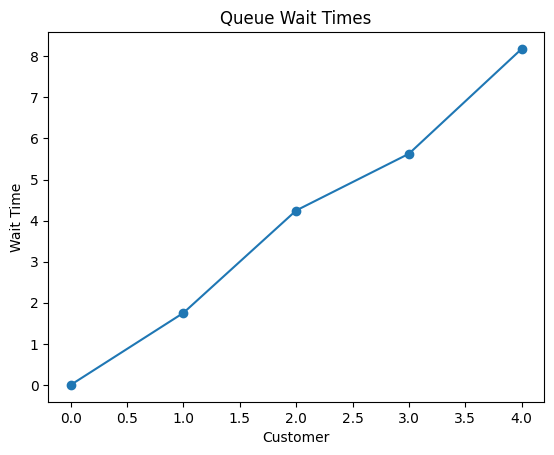

In [4]:
import simpy
import random
import matplotlib.pyplot as plt

def customer(env, name, service_time, queue, wait_times):
    arrival_time = env.now
    print(f"{name} arrives at time {arrival_time}")

    with queue.request() as req:
        yield req

        wait_time = env.now - arrival_time
        wait_times.append(wait_time)
        print(f"{name} starts service at time {env.now} after waiting for {wait_time}")

        yield env.timeout(service_time)
        print(f"{name} leaves at time {env.now}")

def run_simulation():
    env = simpy.Environment()
    queue = simpy.Resource(env, capacity=1)  # One server

    wait_times = []

    for i in range(5):
        service_time = random.uniform(1, 3)  # Random service time for each customer
        env.process(customer(env, f'Customer {i+1}', service_time, queue, wait_times))

    env.run()

    # Plotting
    plt.plot(wait_times, marker='o')
    plt.title('Queue Wait Times')
    plt.xlabel('Customer')
    plt.ylabel('Wait Time')
    plt.show()

if __name__ == "__main__":
    run_simulation()

In [5]:
def car(env):
    while True:
        print('Start parking at %d' % env.now)
        parking_duration = 5
        yield env.timeout(parking_duration)

        print('Start driving at %d' % env.now)
        trip_duration = 2
        yield env.timeout(trip_duration)

In [6]:
env = simpy.Environment()
env.process(car(env))

env.run(until=15)

Start parking at 0
Start driving at 5
Start parking at 7
Start driving at 12
Start parking at 14


In [7]:
class Car(object):
    def __init__(self, env):
        self.env = env
        # Start the run process everytime an instance is created.
        self.action = env.process(self.run())

    def run(self):
        while True:
            print('Start parking and charging at %d' % self.env.now)
            charge_duration = 5
            # We yield the process that process() returns
            # to wait for it to finish
            yield self.env.process(self.charge(charge_duration))

            # The charge process has finished and
            # we can start driving again.
            print('Start driving at %d' % self.env.now)
            trip_duration = 2
            yield self.env.timeout(trip_duration)

    def charge(self, duration):
        yield self.env.timeout(duration)

In [8]:
env = simpy.Environment()
car = Car(env)
env.run(until=15)

Start parking and charging at 0
Start driving at 5
Start parking and charging at 7
Start driving at 12
Start parking and charging at 14
